In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import sqlite3
import pandas as pd

In [48]:
conn = sqlite3.connect('exps.db')
df = pd.read_sql('select * from results natural join experiments', conn)

df_best = pd.read_sql('select * from experiments natural join \
                        (select exp_id, max(val_acc) as best_acc \
                        from results group by exp_id)', conn)

conn.close()

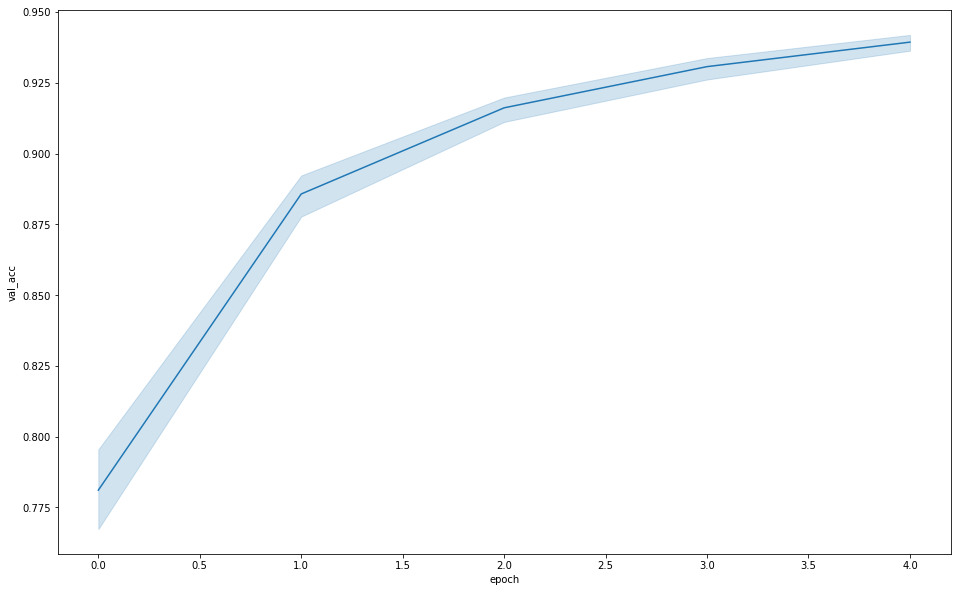

In [49]:
f, ax = plt.subplots(figsize=(16, 10))
sns.lineplot(data=df, x='epoch', y='val_acc', ax=ax)

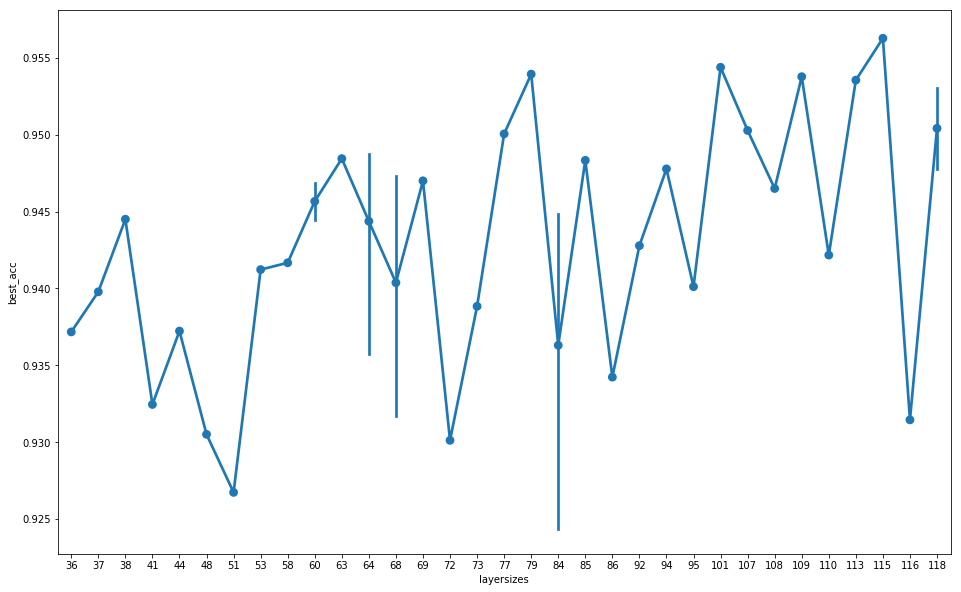

In [50]:
inds = df_best['layers'] == 1

f, ax = plt.subplots(figsize=(16, 10))
sns.pointplot(x=df_best[inds]['layersizes'].astype(int), y=df_best[inds]['best_acc'])

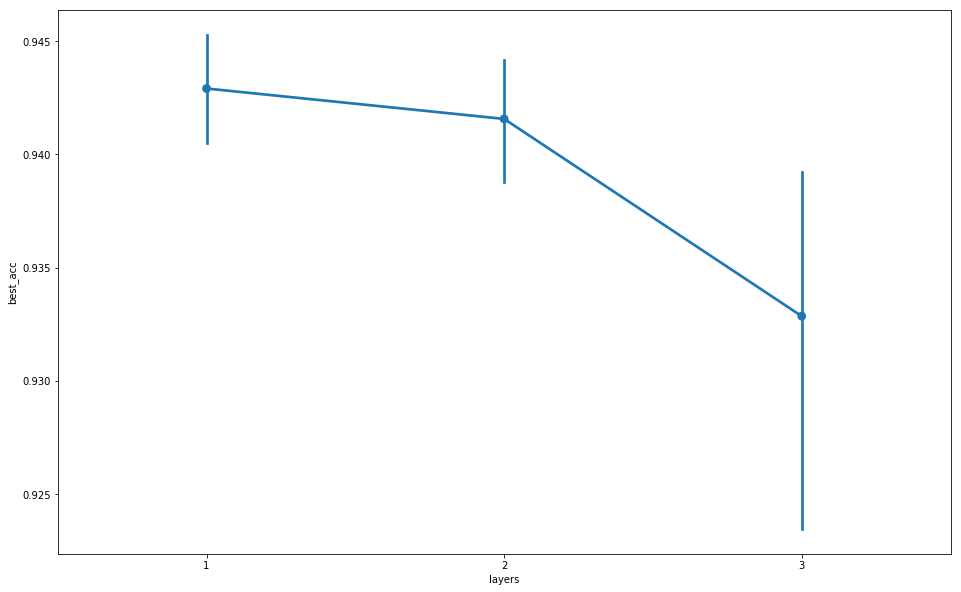

In [52]:
f, ax = plt.subplots(figsize=(16, 10))
sns.pointplot(data=df_best, x='layers', y='best_acc')

In [62]:
df_best.iloc[df_best['best_acc'].idxmax()]

exp_id              110
layers                2
layersizes        98 59
lr            0.0213211
best_acc       0.958278
Name: 110, dtype: object